In [1]:
import pandas
import numpy as np

%matplotlib inline

In [2]:
data = pandas.read_excel('data.xlsx')

# Observar los datos
data

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78
...,...,...,...
124995,CS8433,2011-06-26,64
124996,CS7232,2014-08-19,38
124997,CS8731,2014-11-28,42
124998,CS8133,2013-12-14,13


In [3]:
# Describir los datos
data.describe()

,trans_date,tran_amount
count,125000,125000.000000
mean,2013-04-13 12:01:16.031999744,64.991912
min,2011-05-16 00:00:00,10.000000
25%,2012-04-29 00:00:00,47.000000
50%,2013-04-14 00:00:00,65.000000
75%,2014-03-28 00:00:00,83.000000
max,2015-03-16 00:00:00,105.000000
std,NaN,22.860006


In [4]:
# Verificar si hay datos nulos
data.isnull().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

<Axes: >

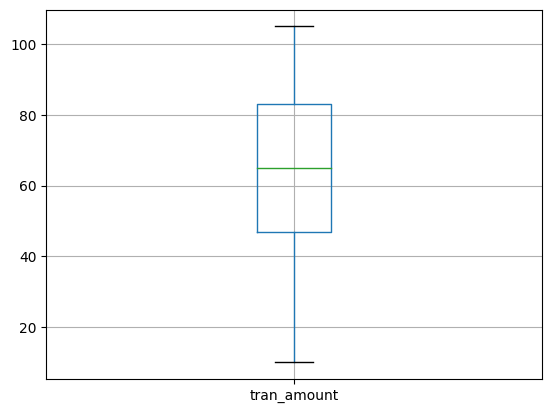

In [5]:
# Verificar si hay outliers
data.boxplot()

In [6]:
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [7]:
# Agrupar los datos por el id
agg_df = data.groupby('customer_id').agg(
    freq = ('tran_amount', 'count'),
    avg_amount = ('tran_amount', 'mean'),
    max_amount = ('tran_amount', 'max'),
    min_amount = ('tran_amount', 'min'),
)

agg_df

,freq,avg_amount,max_amount,min_amount
customer_id,,,,
CS1112,15,67.466667,105,36
CS1113,20,74.500000,98,36
CS1114,19,75.368421,105,37
CS1115,22,75.409091,104,41
CS1116,13,65.923077,105,40
...,...,...,...,...
CS8996,13,44.769231,79,24
CS8997,14,38.785714,75,21
CS8998,13,48.000000,79,13


In [8]:
# Definir los cuantiles de los datos - 25%, 50% y 75%
quantiles = agg_df[['freq', 'avg_amount', 'min_amount', 'max_amount']].quantile([0.35, 0.75])

quantiles

,freq,avg_amount,min_amount,max_amount
0.35,16.0,64.045788,35.0,97.0
0.75,22.0,72.000000,38.0,104.0


In [9]:
# Clasiificar los datos en 3 categorias por cuantiles
def classify_customer(row):
    if row['freq'] <= quantiles.loc[0.35, 'freq']:
        freq_val = 1
    elif row['freq'] <= quantiles.loc[0.75, 'freq']:
        freq_val = 2
    else:
        freq_val = 3

    if row['avg_amount'] <= quantiles.loc[0.35, 'avg_amount']:
        avg_amount_val = 1
    elif row['avg_amount'] <= quantiles.loc[0.75, 'avg_amount']:
        avg_amount_val = 2
    else:
        avg_amount_val = 3

    if row['max_amount'] <= quantiles.loc[0.35, 'max_amount']:
        max_amount_val = 1
    elif row['max_amount'] <= quantiles.loc[0.75, 'max_amount']:
        max_amount_val = 2
    else:
        max_amount_val = 3

    # Si es necesario se puede agregar un peso a cada variable
    score = (freq_val + avg_amount_val + max_amount_val) / 3

    if score <= 1.5:
        return 'Low'
    elif score <= 2.5:
        return 'Medium'
    else:   
        return 'High'
    
agg_df['category'] = agg_df.apply(classify_customer, axis=1)

agg_df.to_csv('agg_data.csv')

agg_df


,freq,avg_amount,max_amount,min_amount,category
customer_id,,,,,
CS1112,15,67.466667,105,36,Medium
CS1113,20,74.500000,98,36,Medium
CS1114,19,75.368421,105,37,High
CS1115,22,75.409091,104,41,Medium
CS1116,13,65.923077,105,40,Medium
...,...,...,...,...,...
CS8996,13,44.769231,79,24,Low
CS8997,14,38.785714,75,21,Low
CS8998,13,48.000000,79,13,Low


In [11]:
agg_df["category"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

<Axes: xlabel='category'>

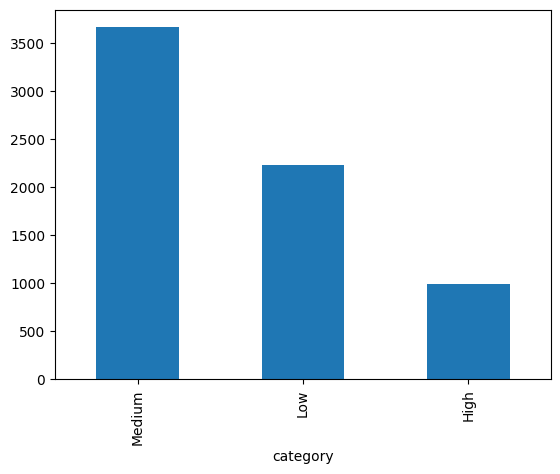

In [ ]:
# Visualizar los datos
agg_df['category'].value_counts().plot(kind='bar')

In [ ]:
# Dividir los datos en X y Y

X = agg_df.drop('category', axis=1)
y = agg_df['category']

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train

(5511, 4) (1378, 4) (5511,) (1378,)


,freq,avg_amount,max_amount,min_amount
customer_id,,,,
CS2081,25,69.960000,99,42
CS7541,20,45.000000,78,11
CS5196,22,61.636364,97,36
CS7628,13,38.692308,74,11
CS8099,13,45.615385,75,15
...,...,...,...,...
CS4884,19,60.631579,103,35
CS7303,18,53.944444,79,10
CS7338,11,44.909091,61,23


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Castear las etiquetas a numeros
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Visualizar los datos
y_test

array([1, 1, 2, ..., 2, 1, 0])

In [ ]:
# Crear el modelo
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50


173/173 [==============================] - 0s 561us/step - loss: 0.5798 - accuracy: 0.7648
Epoch 2/50
173/173 [==============================] - 0s 525us/step - loss: 0.3213 - accuracy: 0.8761
Epoch 3/50
173/173 [==============================] - 0s 534us/step - loss: 0.2654 - accuracy: 0.8935
Epoch 4/50
173/173 [==============================] - 0s 521us/step - loss: 0.2406 - accuracy: 0.8978
Epoch 5/50
173/173 [==============================] - 0s 554us/step - loss: 0.2272 - accuracy: 0.8987
Epoch 6/50
173/173 [==============================] - 0s 539us/step - loss: 0.2137 - accuracy: 0.9051
Epoch 7/50
173/173 [==============================] - 0s 533us/step - loss: 0.2069 - accuracy: 0.9089
Epoch 8/50
173/173 [==============================] - 0s 595us/step - loss: 0.2020 - accuracy: 0.9102
Epoch 9/50
173/173 [==============================] - 0s 555us/step - loss: 0.1970 - accuracy: 0.9125
Epoch 10/50
173/173 [==============================] - 0s 529us/step - loss: 0.1927 - accurac

In [ ]:
# Evaluar el modelo
model.evaluate(X_test, y_test)

 1/44 [..............................] - ETA: 2s - loss: 0.0423 - accuracy: 1.0000

44/44 [==============================] - 0s 514us/step - loss: 0.0733 - accuracy: 0.9761


[0.07326658070087433, 0.9760522246360779]

In [ ]:
# Classification report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print('Classification Report')
print(classification_report(y_test, y_pred))

44/44 [==============================] - 0s 433us/step
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       204
           1       0.99      0.99      0.99       451
           2       0.96      0.99      0.98       723

    accuracy                           0.98      1378
   macro avg       0.98      0.96      0.97      1378
weighted avg       0.98      0.98      0.98      1378



In [ ]:
# Datos de prueba
test_data = np.array([10, 100, 100, 100]).reshape(1, -1)
test_data = scaler.transform(test_data)

# Predecir
pred = model.predict(test_data)
pred = np.argmax(pred, axis=1)
le_predict = le.inverse_transform(pred)[0]

print('Predicted:', le_predict)


1/1 [==============================] - 0s 9ms/step
Predicted: Medium


/home/dbrito/anaconda3/envs/gbm/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
